In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline


## PSU to reference salinity
SR = (35.16504/35) g kg–1 * S

In [3]:
infil = loadtxt('../DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('../DATASETS/grl2016_nu.txt')

In [4]:
crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]



 Reference Salinity of
the local seawater sample is then determined from the
Practical Salinity according to the simple formula
SR = (35.16504/35) g kg–1  S.

In [5]:
len(no3)

860

In [6]:
dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35

In [7]:
DIC = nc.Dataset('DIC_may012017_end2017.nc')

DIC_mod = DIC['model_output']['mod_point'][:]
is_ref = DIC['model_output']['mod_x'][:]
js_ref = DIC['model_output']['mod_y'][:]

TA = nc.Dataset('TA_may012017_end2017.nc')

TA_mod = TA['model_output']['mod_point'][:]
is_ref2 = TA['model_output']['mod_x'][:]
js_ref2 = TA['model_output']['mod_y'][:]

NO3 = nc.Dataset('NO3_may012017_end2017.nc')

NO3_mod = NO3['model_output']['mod_point'][:]
is_ref3 = NO3['model_output']['mod_x'][:]
js_ref3 = NO3['model_output']['mod_y'][:]

sal = nc.Dataset('sal_may012017_end2017.nc')

sal_mod = sal['model_output']['mod_point'][:]
is_ref4 = sal['model_output']['mod_x'][:]
js_ref4 = sal['model_output']['mod_y'][:]

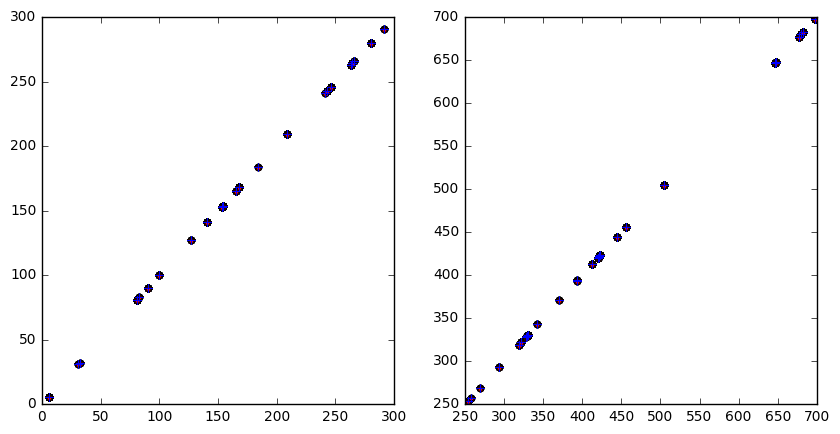

In [8]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i ==1:
        ax.plot(is_ref,is_ref2,'ko',markersize=5)
        ax.plot(is_ref,is_ref3,'r*',markersize=6)
        ax.plot(is_ref,is_ref4,'b+')
    if i ==2:
        ax.plot(js_ref,js_ref2,'ko',markersize=5)
        ax.plot(js_ref,js_ref3,'r*',markersize=6)
        ax.plot(js_ref,js_ref4,'b+')
    

## Correlation plot, model DIC 

In [9]:
loc_tag = np.zeros_like(dic)
loc_tag[:] = 4

for w in range(0,len(loc_tag)):
    x = is_ref[w]
    y = js_ref[w]
    #jdf is 1
    if  (x <200) & (y>220) & (y<500) :
        loc_tag[w] = 1
        #n strait
    if  (y >= 550):
        loc_tag[w] = 2
        #central strait
    if (x> 150) & (y>380) & (y<550):
        loc_tag[w] = 3
        #4 is haro/puget
    if ((x>150) & (y>320) & (y<370)):
        loc_tag[w] =4


  
    #4 is haro/puget

In [17]:
DIC_mod[DIC_mod==0]=np.nan

#DIC
dic_jdf=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==1)]
dic_haro=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==4)]
dic_ns =dic_conv[~(np.isnan(DIC_mod))&(loc_tag==2)]
dic_cs=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==3)]

dic_MODjdf=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
dic_MODharo=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
dic_MODns =DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
dic_MODcs=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]

dic_compbl = dic_conv[~(np.isnan(DIC_mod))]
DIC_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]

#salinity
sal_jdf=S_rs[~(np.isnan(DIC_mod))&(loc_tag==1)]
sal_haro=S_rs[~(np.isnan(DIC_mod))&(loc_tag==4)]
sal_ns =S_rs[~(np.isnan(DIC_mod))&(loc_tag==2)]
sal_cs=S_rs[~(np.isnan(DIC_mod))&(loc_tag==3)]

sal_MODjdf=sal_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
sal_MODharo=sal_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
sal_MODns =sal_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
sal_MODcs=sal_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]


#ta
ta_jdf=alk_conv[~(np.isnan(DIC_mod))&(loc_tag==1)]
ta_haro=alk_conv[~(np.isnan(DIC_mod))&(loc_tag==4)]
ta_ns =alk_conv[~(np.isnan(DIC_mod))&(loc_tag==2)]
ta_cs=alk_conv[~(np.isnan(DIC_mod))&(loc_tag==3)]

ta_MODjdf=TA_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
ta_MODharo=TA_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
ta_MODns =TA_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
ta_MODcs=TA_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]


#no3
NO3jdf=no3[~(np.isnan(DIC_mod))&(loc_tag==1)]
NO3haro=no3[~(np.isnan(DIC_mod))&(loc_tag==4)]
NO3ns =no3[~(np.isnan(DIC_mod))&(loc_tag==2)]
NO3cs=no3[~(np.isnan(DIC_mod))&(loc_tag==3)]

NO3_modjdf=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
NO3_modharo=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
NO3_modns =NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
NO3_modcs=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]







## salinity comparison

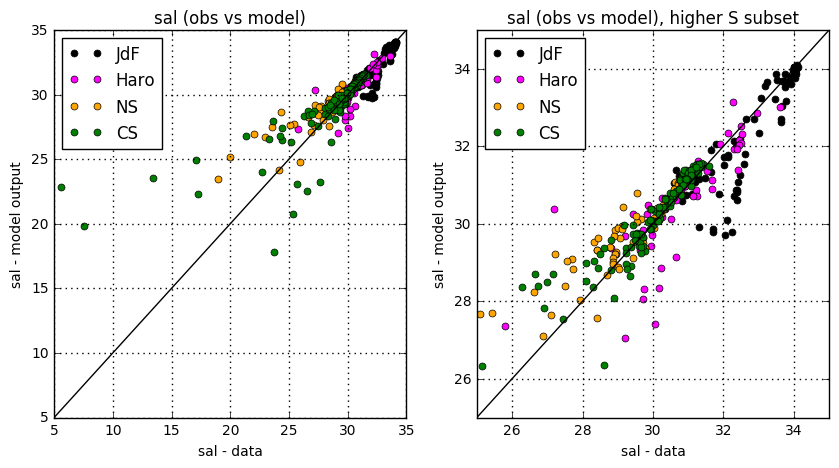

In [11]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i == 1:
        ax.plot(sal_jdf,sal_MODjdf,'ko',markersize=5)
        ax.plot(sal_haro,sal_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,sal_MODns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,sal_MODcs,c='green', marker='o',linestyle='None',markersize=5)
        #ax.plot(sal_compbl,sal_mod_compbl,'r*',markersize=5)

        ax.set_xlabel('sal - data')
        ax.set_ylabel('sal - model output')
        ax.legend(['JdF','Haro','NS','CS'],loc='best')
        ax.set_xlim(5,35)
        ax.set_ylim(5,35)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_title('sal (obs vs model)')
        ax.plot([3,35],[3,35],'k')    

    if i == 2:
        ax.plot(sal_jdf,sal_MODjdf,'ko',markersize=5)
        ax.plot(sal_haro,sal_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,sal_MODns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,sal_MODcs,c='green', marker='o',linestyle='None',markersize=5)
        #ax.plot(sal_compbl,sal_mod_compbl,'r*',markersize=5)

        ax.set_xlabel('sal - data')
        ax.set_ylabel('sal - model output')
        ax.legend(['JdF','Haro','NS','CS'],loc='best')
        ax.set_xlim(25,35)
        ax.set_ylim(25,35)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_title('sal (obs vs model), higher S subset')
        ax.plot([3,35],[3,35],'k')
    

## dic vs sal

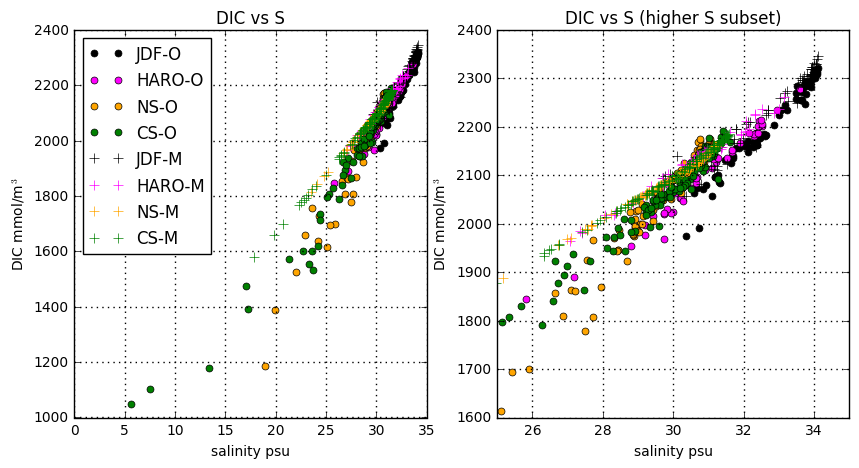

In [12]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i==1:
        ax.plot(sal_jdf,dic_jdf,'ko',markersize=5)
        ax.plot(sal_haro,dic_haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,dic_ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,dic_cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,dic_MODjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,dic_MODharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,dic_MODns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,dic_MODcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        ax.set_xlim([0,35])
        ax.set_ylim([1000,2400])
        ax.set_title('DIC vs S')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('DIC mmol/m$^3$')

    if i==2:
        ax.plot(sal_jdf,dic_jdf,'ko',markersize=5)
        ax.plot(sal_haro,dic_haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,dic_ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,dic_cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,dic_MODjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,dic_MODharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,dic_MODns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,dic_MODcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.set_xlim([25,35])
        ax.set_ylim([1600,2400])
        ax.set_title('DIC vs S (higher S subset)')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('DIC mmol/m$^3$')
    

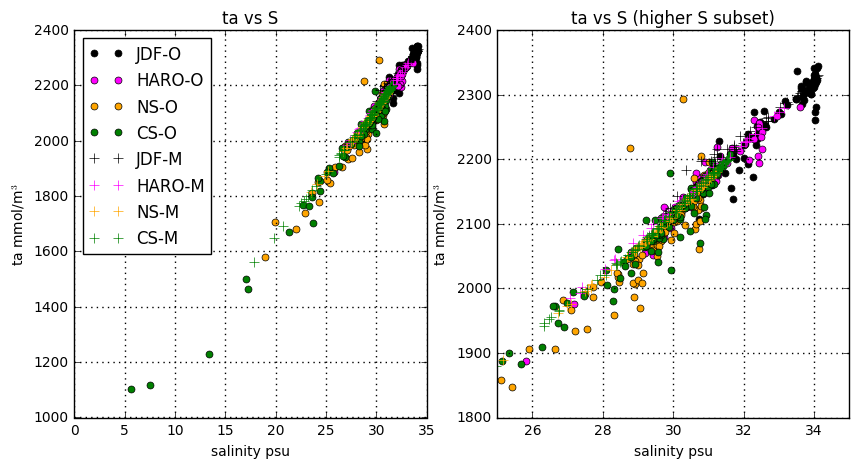

In [13]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i==1:
        ax.plot(sal_jdf,ta_jdf,'ko',markersize=5)
        ax.plot(sal_haro,ta_haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,ta_ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,ta_cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,ta_MODjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,ta_MODharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,ta_MODns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,ta_MODcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        ax.set_xlim([0,35])
        ax.set_ylim([1000,2400])
        ax.set_title('ta vs S')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('ta mmol/m$^3$')

    if i==2:
        ax.plot(sal_jdf,ta_jdf,'ko',markersize=5)
        ax.plot(sal_haro,ta_haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,ta_ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,ta_cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,ta_MODjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,ta_MODharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,ta_MODns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,ta_MODcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.set_xlim([25,35])
        ax.set_ylim([1800,2400])
        ax.set_title('ta vs S (higher S subset)')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('ta mmol/m$^3$')
    

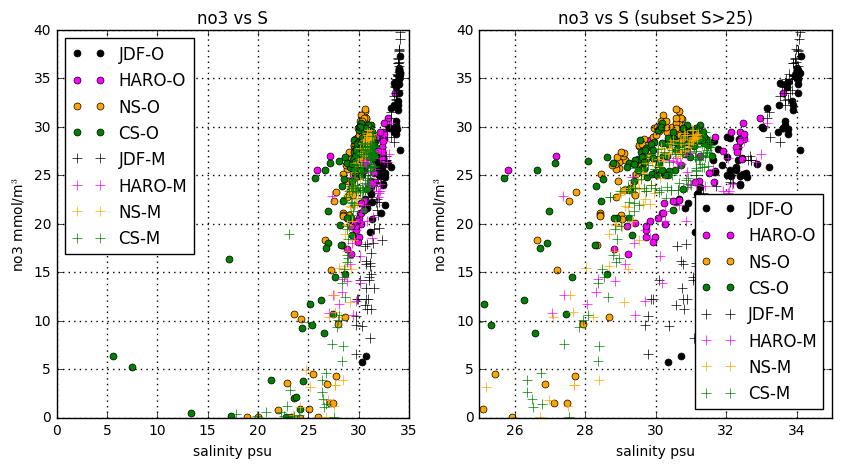

In [14]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i==1:
        ax.plot(sal_jdf,NO3jdf,'ko',markersize=5)
        ax.plot(sal_haro,NO3haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,NO3ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,NO3cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,NO3_modjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,NO3_modharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,NO3_modns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,NO3_modcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        ax.set_xlim([0,35])
        #ax.set_ylim([1000,2400])
        ax.set_title('no3 vs S')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('no3 mmol/m$^3$')

    if i==2:
        ax.plot(sal_jdf,NO3jdf,'ko',markersize=5)
        ax.plot(sal_haro,NO3haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,NO3ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,NO3cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,NO3_modjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,NO3_modharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,NO3_modns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,NO3_modcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        ax.set_xlim([25,35])
        #ax.set_ylim([1000,2400])
        ax.set_title('no3 vs S (subset S>25)')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('no3 mmol/m$^3$')
    

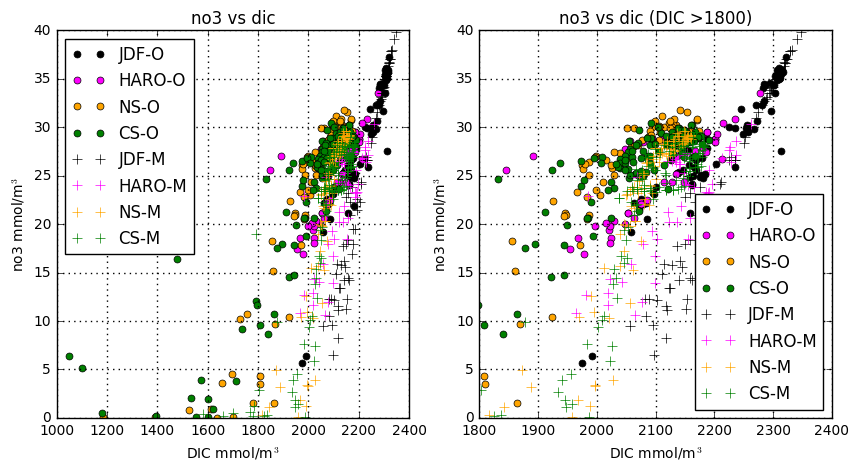

In [15]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i==1:
        ax.plot(dic_jdf,NO3jdf,'ko',markersize=5)
        ax.plot(dic_haro,NO3haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(dic_ns,NO3ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(dic_cs,NO3cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(dic_MODjdf,NO3_modjdf,'k+',markersize=7)
        ax.plot(dic_MODharo,NO3_modharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(dic_MODns,NO3_modns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(dic_MODcs,NO3_modcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        #ax.set_xlim([0,35])
        #ax.set_ylim([1000,2400])
        ax.plot([0,0],[1000,2400],'k')
        ax.set_title('no3 vs dic')
        ax.set_xlabel('DIC mmol/m$^3$')
        ax.set_ylabel('no3 mmol/m$^3$')

    if i==2:
        ax.plot(dic_jdf,NO3jdf,'ko',markersize=5)
        ax.plot(dic_haro,NO3haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(dic_ns,NO3ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(dic_cs,NO3cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(dic_MODjdf,NO3_modjdf,'k+',markersize=7)
        ax.plot(dic_MODharo,NO3_modharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(dic_MODns,NO3_modns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(dic_MODcs,NO3_modcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        #ax.set_xlim([25,35])
        ax.set_xlim([1800,2400])
        ax.set_title('no3 vs dic (DIC >1800)')
        ax.set_xlabel('DIC mmol/m$^3$')
        ax.set_ylabel('no3 mmol/m$^3$')
    

In [16]:
loc_tag = np.zeros_like(dic)
loc_tag[:] = 4

for w in range(0,len(loc_tag)):
    x = is_ref[w]
    y = js_ref[w]
    #jdf is 1
    if  (x <200) & (y>220) & (y<500) :
        loc_tag[w] = 1
        #n strait
    if  (y >= 550):
        loc_tag[w] = 2
        #central strait
    if (x> 150) & (y>380) & (y<550):
        loc_tag[w] = 3
        #4 is haro/puget
    if ((x>150) & (y>320) & (y<370)):
        loc_tag[w] =4


  
    #4 is haro/puget